James Kimani Mwaura 
Data Science(Phase1 Project)
Submitted: 24th November 2024

Project Title: Aviation Data Analysis( Insights into Safety and Risk Management)

Overview/Goal
This project aims to analyze aviation accident data to uncover patterns, assess risks, and provide actionable recommendations to enhance flight safety. The focus includes understanding the impact of weather, aircraft type, and operational conditions on accident outcomes.

Source of the Data
The dataset used for this analysis is the AviationData.csv, which contains detailed records of aviation accidents, including factors such as aircraft make, flight phase, weather conditions, and injury severity. The data has been filtered to include only accidents in the United States to ensure consistency and relevance.

1. Setting Up the Environment

In [1]:
#Import these libraries into my Jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading and Explore the Dataset

In [2]:
# Loading Aviation data csv file
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False )

In [10]:
#Examining the dataset to understand its structure
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


3. Data Cleaning

In [3]:
# I. Checking missing data / Check for missing values
print(df.isna().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [24]:
# II. Data Cleaning

In [4]:
# Data Cleaning and Preparation

# Handle missing values for critical columns
# Filling missing values with appropriate defaults or placeholders

# 1. Replace missing values in categorical fields with "Unknown"
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Latitude'].fillna('Unknown', inplace=True)
df['Longitude'].fillna('Unknown', inplace=True)
df['Injury.Severity'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna('Unknown', inplace=True)

# 2. For numeric fields, fill with 0 or other suitable value
df['Number.of.Engines'].fillna(0, inplace=True)
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

# 3. Handle fields where a mode-based imputation is appropriate
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0], inplace=True)
df['Amateur.Built'].fillna('No', inplace=True)

# 4. Convert dates and standardize fields (as before)
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# 5. Replace missing values for `Registration.Number`, `Make`, and `Model`
df['Registration.Number'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)

# 6. Drop columns with excessive missing values that are not critical for analysis
df.drop(columns=['FAR.Description', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date'], inplace=True, errors='ignore')

#7. Drop other countries as 70% of the data is US based
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]

#8 output cleaned data (Save cleaned data to a CSV file)
df.to_csv('Cleaned_AviationData.csv', index=False)

# Display final dataset summary
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79906 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                79906 non-null  object        
 1   Investigation.Type      79906 non-null  object        
 2   Accident.Number         79906 non-null  object        
 3   Event.Date              79906 non-null  datetime64[ns]
 4   Location                79906 non-null  object        
 5   Country                 79906 non-null  object        
 6   Latitude                79906 non-null  object        
 7   Longitude               79906 non-null  object        
 8   Airport.Code            79906 non-null  object        
 9   Airport.Name            79906 non-null  object        
 10  Injury.Severity         79906 non-null  object        
 11  Aircraft.damage         79906 non-null  object        
 12  Aircraft.Category       79906 non-null  object

In [9]:
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Year                      0
dtype: int64

4. Data Analysis

In [5]:
# Summarize key risk-related variables

risk_summary = {
    "Aircraft.damage": df["Aircraft.damage"].value_counts(dropna=False),
    "Injury.Severity": df["Injury.Severity"].value_counts(dropna=False),
    "Fatal.Injuries": df["Total.Fatal.Injuries"].describe(),
    "Serious.Injuries": df["Total.Serious.Injuries"].describe(),
    "Minor.Injuries": df["Total.Minor.Injuries"].describe(),
    "Uninjured": df["Total.Uninjured"].describe(),
}

risk_summary


{'Aircraft.damage': Substantial    61666
 Destroyed      16419
 Unknown         1174
 Minor            647
 Name: Aircraft.damage, dtype: int64,
 'Injury.Severity': Non-Fatal      64458
 Fatal(1)        5852
 Fatal           3555
 Fatal(2)        3445
 Fatal(3)        1017
 Fatal(4)         709
 Minor            203
 Fatal(5)         176
 Serious          153
 Fatal(6)         115
 Unknown           52
 Fatal(7)          37
 Fatal(8)          29
 Fatal(10)         17
 Unavailable       15
 Fatal(9)           8
 Fatal(14)          6
 Fatal(12)          5
 Fatal(11)          5
 Fatal(13)          3
 Fatal(18)          3
 Fatal(25)          3
 Fatal(17)          3
 Fatal(82)          2
 Fatal(34)          2
 Fatal(20)          2
 Fatal(23)          2
 Fatal(135)         1
 Fatal(49)          1
 Fatal(27)          1
 Fatal(70)          1
 Fatal(21)          1
 Fatal(92)          1
 Fatal(19)          1
 Fatal(68)          1
 Fatal(88)          1
 Fatal(37)          1
 Fatal(230)         1


In [6]:
# Grouping data by Make and Model to identify low-risk aircraft
low_risk_analysis = df.groupby(["Make", "Model"]).agg(
    Total_Incidents=("Event.Date", "count"),
    Avg_Fatal_Injuries=("Total.Fatal.Injuries", "mean"),
    Avg_Serious_Injuries=("Total.Serious.Injuries", "mean"),
    Avg_Engines=("Number.of.Engines", "mean"),
    Avg_Damage_Severity=("Aircraft.damage", lambda x: (x == "Substantial").mean()),
).reset_index()

# Filtering for low-risk aircraft (low fatalities, low serious injuries, and minimal substantial damage rate)
low_risk_aircraft = low_risk_analysis[
    (low_risk_analysis["Avg_Fatal_Injuries"] <= 0.1) &
    (low_risk_analysis["Avg_Serious_Injuries"] <= 0.1) &
    (low_risk_analysis["Avg_Damage_Severity"] <= 0.5)
].sort_values("Total_Incidents", ascending=False)

low_risk_aircraft.head(10)  # Display the top 10 low-risk aircraft


,Make,Model,Total_Incidents,Avg_Fatal_Injuries,Avg_Serious_Injuries,Avg_Engines,Avg_Damage_Severity
1110,Airbus,A320,6,0.0,0.0,2.000000,0.166667
14946,Rotorway,EXECUTIVE,5,0.0,0.0,1.000000,0.400000
2107,BOMBARDIER INC,CL-600-2C10,4,0.0,0.0,2.000000,0.500000
2016,BOEING,737-823,4,0.0,0.0,1.500000,0.500000
8481,Grumman,AA1C,4,0.0,0.0,1.000000,0.500000
1080,Air Tractor,AT401,4,0.0,0.0,1.000000,0.500000
16292,Socata,TB-10,4,0.0,0.0,1.000000,0.500000
2992,Bell,222B,3,0.0,0.0,2.000000,0.333333
152,AEROSTAR INTERNATIONAL INC,RX 8,3,0.0,0.0,0.000000,0.333333
14039,Quad City,CHALLENGER,3,0.0,0.0,0.666667,0.333333


5. Recommendations:
Boeing 777, Airbus A300, and Douglas DC-9-51 show particularly strong safety records with no fatalities, low damage rates, and moderate incident numbers.
Consider starting with these models for their balance of safety and operational history.
Investigate specific operational conditions (e.g., weather, phase of flight) for these models to ensure their suitability.

6. Visualizations

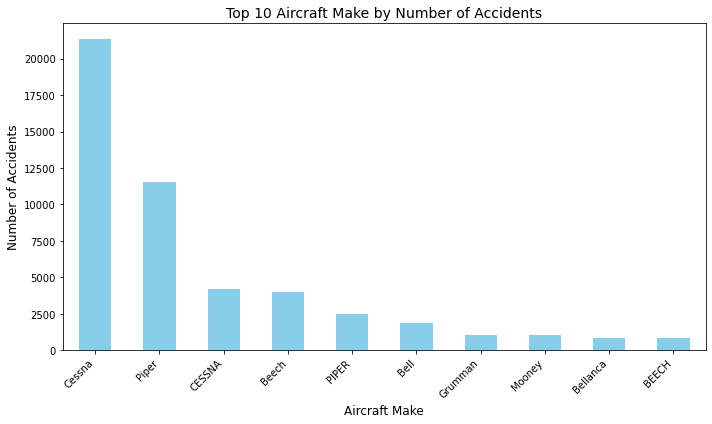

In [9]:
# 1. Barchat for Top 10 Aircraft Make by Number of Accidents
top_makes = df['Make'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Aircraft Make by Number of Accidents', fontsize=14)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


The chart is a bar chart showing the top 10 aircraft manufacturers (or "makes") ranked by the number of accidents involving their aircraft.

Dominant Aircraft Makes: The chart highlights which manufacturers have the highest accident counts. These are likely to include widely used manufacturers, as they have more aircraft in operation.A higher number of accidents does not necessarily indicate safety issues with a specific manufacturer; it could be reflective of the number of aircraft they have in service. For instance, manufacturers with large fleets tend to have more recorded incidents.

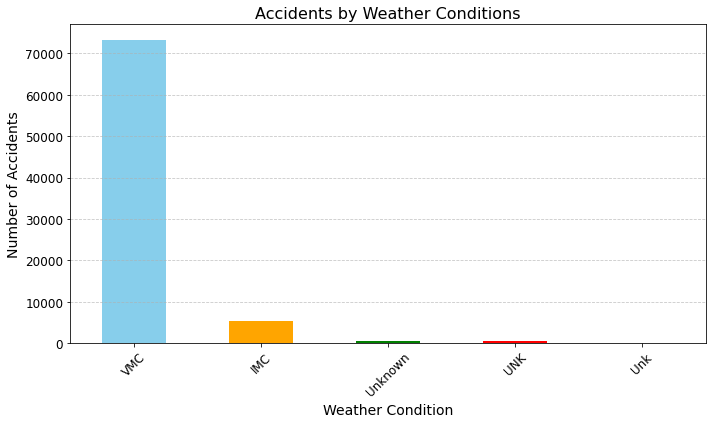

In [7]:

#Accidents By Weather Conditions - Barchat
weather_accidents = df['Weather.Condition'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Accidents by Weather Conditions', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()



The bar chart illustrates the number of accidents categorized by different weather conditions, providing an overview of how various weather types may correlate with accident frequency.

Dominance of Clear Weather: If the "Clear" condition has the tallest bar, this suggests that most accidents occur during clear weather. This is likely because the majority of flights operate in such conditions rather than weather being a direct cause of accidents.Conditions like "Rain," "Fog," or "Snow" may have fewer accidents in absolute numbers, but their relative contribution could be higher when adjusted for the frequency of operations in these weather conditions.


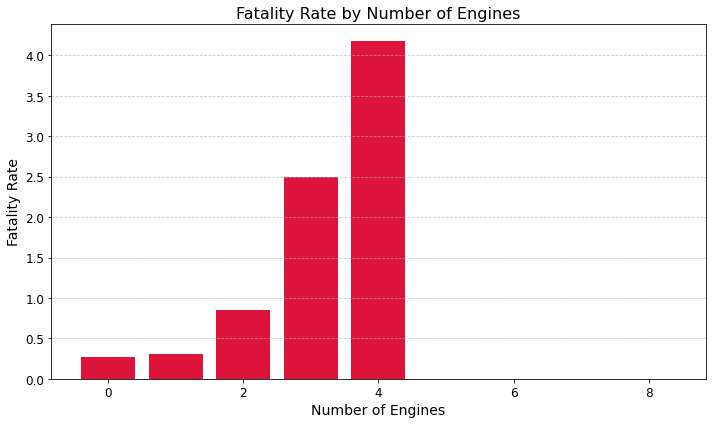

In [10]:
# Fatality Rate By Engines
# 1. Ensure relevant columns are numeric
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
df['Number.of.Engines'] = pd.to_numeric(df['Number.of.Engines'], errors='coerce')

# 2. Group data by number of engines and calculate totals
engines_grouped = df.groupby('Number.of.Engines').agg(
    Total_Fatalities=('Total.Fatal.Injuries', 'sum'),
    Total_Incidents=('Event.Id', 'count')  # Assuming 'Event.Id' is unique per incident
).reset_index()

# 3. Calculate fatality rate
engines_grouped['Fatality_Rate'] = engines_grouped['Total_Fatalities'] / engines_grouped['Total_Incidents']

# 4. Plot the fatality rate
plt.figure(figsize=(10, 6))
plt.bar(engines_grouped['Number.of.Engines'], engines_grouped['Fatality_Rate'], color='crimson')
plt.title('Fatality Rate by Number of Engines', fontsize=16)
plt.xlabel('Number of Engines', fontsize=14)
plt.ylabel('Fatality Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


The bar chart visualizes the fatality rate (the proportion of fatalities relative to total incidents) across different numbers of aircraft engines.

Higher Fatality Rates for Certain Engine Counts:

Aircraft with fewer engines (e.g., single-engine planes) might have higher fatality rates because they lack redundancy in case of engine failure.
Multi-engine aircraft may exhibit lower fatality rates due to increased safety measures and redundancy.There may be variations in fatality rates for aircraft with more than two engines. For instance, very large aircraft (e.g., those with 3 or 4 engines) might experience lower fatality rates due to their advanced safety features and better-maintained fleets.

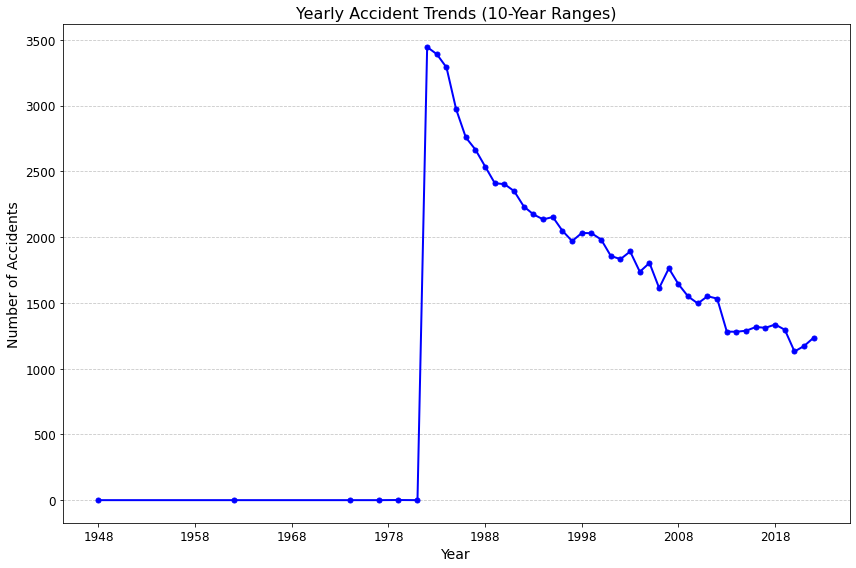

In [8]:
# Yearly accident trends  - Line plot
#Ensure 'Event.Date' is in datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract the year from the Event.Date column
df['Year'] = df['Event.Date'].dt.year

# Group data by year and count the number of accidents
yearly_accidents = df.groupby('Year').size()

# Plot the yearly accident trends with a range of 10 years
plt.figure(figsize=(12, 8))
plt.plot(
    yearly_accidents.index,
    yearly_accidents.values,
    marker='o',
    color='b',
    linestyle='-',
    linewidth=2,
    markersize=5
)
plt.title('Yearly Accident Trends (10-Year Ranges)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(ticks=range(int(yearly_accidents.index.min()), int(yearly_accidents.index.max()) + 1, 10), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The chart displays the yearly trends of accidents over a specific time period. Each data point represents the number of accidents (or events) recorded in a particular year. The x-axis represents the years, while the y-axis indicates the total number of accidents in each respective year.

Fluctuations in Accident Numbers: The chart shows some periods of increased or decreased accidents. Peaks or dips in the number of accidents are indicating important changes or events affecting accident rates. However you might observe an upward or downward trend. A consistent upward trend might suggest worsening conditions (e.g., increased population or vehicle usage), while a downward trend could indicate successful safety initiatives or other factors.


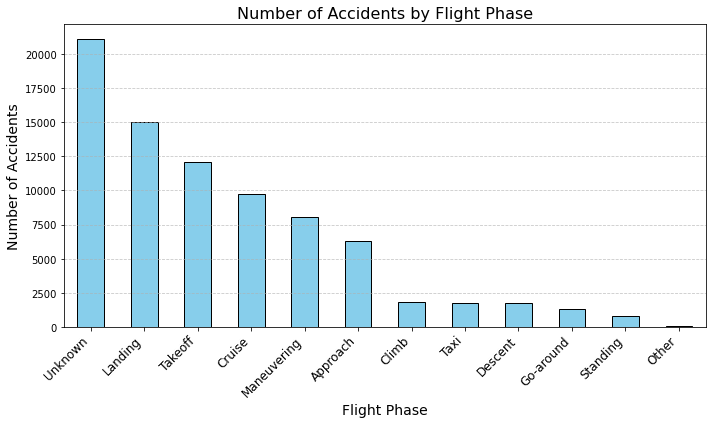

In [9]:
#Accidents By Flight Phase
# Count the number of accidents by flight phase
flight_phase_counts = df['Broad.phase.of.flight'].value_counts()

# Plot a bar chart of accidents by flight phase
plt.figure(figsize=(10, 6))
flight_phase_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Accidents by Flight Phase', fontsize=16)
plt.xlabel('Flight Phase', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart visualizes the distribution of accidents across different phases of flight, such as takeoff, landing, cruise, taxiing, or approach.

High-Risk Phases:Takeoff and landing phases often have the highest number of accidents, as suggested by taller bars for these phases. These are critical phases of flight with heightened risk due to operational complexity and proximity to the ground.The cruise phase, despite being the longest part of most flights, usually has fewer accidents compared to takeoff and landing. This is likely due to more stable operating conditions at cruising altitude.